In [1]:
import matplotlib.pyplot as plt
import numpy as np
from machine_selection import set_screen_size_by_machine
from filebatch_class import (FileBatch)
from teste_datas import (Spec)

from scipy.signal import (cwt, ricker, find_peaks, find_peaks_cwt, peak_widths)

from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh import palettes

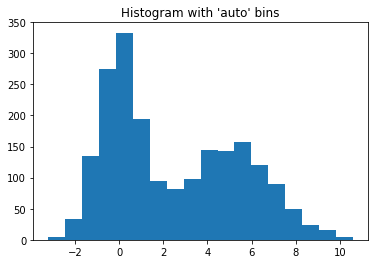

In [2]:
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

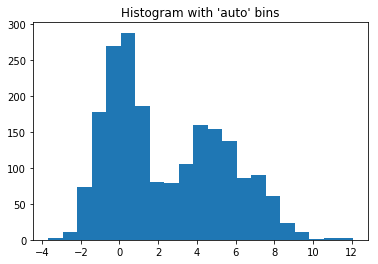

In [3]:

rng = np.random.RandomState()  # 2019-06-17 sem parahmetro: semente aleatohria
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [4]:
print(a)
print(len(a))

[-0.68999442  0.18368908  1.58611862 ...  7.15843128  9.15112036
  8.88151761]
2000


In [5]:
arr_of_arras = np.random.rand(1000, 4000)
len(arr_of_arras)
arr_sta = np.hstack(arr_of_arras)
len(arr_sta)

4000000

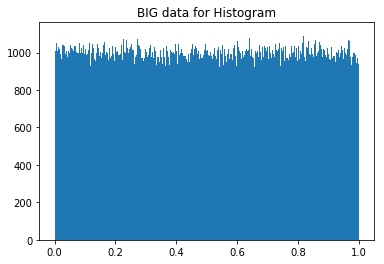

In [6]:
plt.hist(arr_sta, bins=np.linspace(start=0.0, stop=1.0, num=4000))  # arguments are passed to np.histogram
plt.title("BIG data for Histogram")
plt.show()

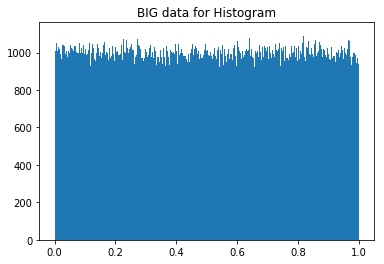

In [7]:
histo, edges = np.histogram(arr_sta, bins=np.linspace(start=0.0, stop=1.0, num=4000))
plt.hist(arr_sta, bins=np.linspace(start=0.0, stop=1.0, num=4000))  # arguments are passed to np.histogram
plt.title("BIG data for Histogram")
plt.show()

In [8]:
histo

array([1055,  989,  973, ...,  913, 1061,  982], dtype=int64)

In [9]:
edges

array([0.00000000e+00, 2.50062516e-04, 5.00125031e-04, ...,
       9.99499875e-01, 9.99749937e-01, 1.00000000e+00])

In [10]:
##################################################
## P.P.

fb = FileBatch()
spec = Spec()

In [11]:
fb.slotSetBatchCHN(
    'C:/Users/mmaduar/OwnDrive/Genie_Transfer/Si'
)

C:/Users/mmaduar/OwnDrive/Genie_Transfer/Si


In [12]:
# print (fb.arqslist)
print (fb.numarqstxt, ' arquivos')

Num de arquivos:       1092 


  arquivos


In [13]:
n = 0
soma_canais = 0
all_specs=[]
for fn in fb.lp:
    # print ( spec.spCounts )
    # Se espectro existe, ret = 0. Senao, -1 ou -2
    if spec.readchnsp( fn ) >= 0:
        # speccwt = SpecCwt()
        # peaks = speccwt.setCounts(spec.spCounts)
        #
        # ar = speccwt.dopksarray( 20 )
        # totar += ar
        # speccwt.build_cwt_matrix( spec.spCounts, 5, 11 )
        # print(fn)
        # print(peaks)
        n += 1
        if spec.spLngData != 4096:
            print (fn)
            print (spec.spLngData)
        else:
            soma_canais += spec.spLngData
            all_specs.append(spec.spCounts)
print(n)
print(soma_canais)
# np.save('totar_2018_EANNORM', totar)
# print(spec.spCounts)
print(len(spec.spCounts))

C:\Users\mmaduar\OwnDrive\Genie_Transfer\Si\SI2004\alg11x11.chn
1024
C:\Users\mmaduar\OwnDrive\Genie_Transfer\Si\si2012\CAGD1c2.Chn
2048
1092
4464640
4096


In [14]:
len(all_specs)

1090

In [15]:
len(all_specs[0])

4096

In [16]:
len(all_specs[-1])

4096

In [17]:
soma_specs = np.sum(all_specs, axis=0)
len(soma_specs)

4096

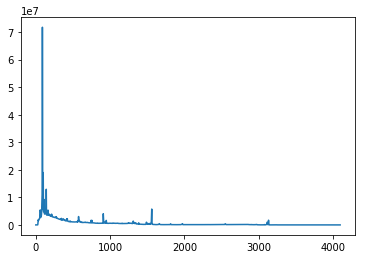

In [18]:
plt.plot(soma_specs)

In [19]:
fb.slotSetBatchCHN(
    'C:/Users/mmaduar/OwnDrive/Genie_Transfer/Si/SI2019'
)

C:/Users/mmaduar/OwnDrive/Genie_Transfer/Si/SI2019


In [20]:
# print (fb.arqslist)
print (fb.numarqstxt, ' arquivos')

Num de arquivos:         22 


  arquivos


In [21]:
n = 0
soma_canais = 0
all_specs=[]
for fn in fb.lp:
    # print ( spec.spCounts )
    # Se espectro existe, ret = 0. Senao, -1 ou -2
    if spec.readchnsp( fn ) >= 0:
        # speccwt = SpecCwt()
        # peaks = speccwt.setCounts(spec.spCounts)
        #
        # ar = speccwt.dopksarray( 20 )
        # totar += ar
        # speccwt.build_cwt_matrix( spec.spCounts, 5, 11 )
        # print(fn)
        # print(peaks)
        n += 1
        if spec.spLngData != 4096:
            print (fn)
            print (spec.spLngData)
        else:
            soma_canais += spec.spLngData
            all_specs.append(spec.spCounts)
print('Espectros validos:', n)
print('Soma dos canais:', soma_canais)
print('Soma dos canais esperada:', n*4096)
# np.save('totar_2018_EANNORM', totar)
# print(spec.spCounts)
print(len(spec.spCounts))

Espectros validos: 22
Soma dos canais: 90112
Soma dos canais esperada: 90112
4096


In [22]:
len(all_specs)

22

In [23]:
len(all_specs[0])

4096

In [24]:
len(all_specs[-1])

4096

In [25]:
soma_specs = np.sum(all_specs, axis=0)
len(soma_specs)

4096

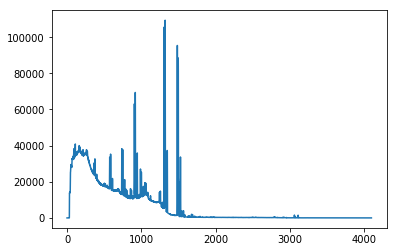

In [26]:
plt.plot(soma_specs)

In [27]:

default_plot_width, default_plot_height = set_screen_size_by_machine()

xs = list(range(len(soma_specs)))


In [28]:
bo1 = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[1.0, 10**8], title="Plot #1: Sum of ~20 IEA-R1.",
   x_axis_label='channels', y_axis_label='counts'
)
bo1.circle(xs, soma_specs, legend="counts", color="lightblue",size=4)
bo1.line(xs, soma_specs, color="red")
# [p2a.line(xs, cwtmatr[i], color=palettes.Plasma[11][i]) for i in range(1,7)]
# bo1.line(xs, cwtmatr[ndx_scale_to_compare], color="red", legend="scale to compare")

# p2a.multi_line(lx,ly, color="orange")
# p2a.multi_line(lx,blins, color="magenta")
# p2a.multi_line(lx,nety, color="green")
# p2a.x(spec2.indicescwt, heis, color="red", size=6)
# p2a.line(xs, cwtmatr[0], color=palettes.Plasma[10][0])
# [p2a2.line(xs, cwtmatr[i], color=palettes.Plasma[11][i]) for i in range(7)]
# p2a2.line(xs, running_std_cwt1, color="blue", legend="std")
# p2a2.line(xs, running_iqr_cwt1, color="red",  legend="iqr" )
# p2a1.line(xs, mean_coeff_cwtmatr, color="orange", legend="MEAN")

show(bo1)

In [29]:
Expect_peak_chans = [
    [[3040, 3210], 2754.1],
    [[1470, 1530], 1332.5],
    [[1300, 1360], 1173.2],
    [[ 900,  950],  810.8],
    [[ 730,  765],  657.8],
    [[ 355,  390],  320.1],
    [[ 250,  300],  228.2]
]

In [30]:
engys = np.asarray( [ro[1] for ro in Expect_peak_chans] )
engys

array([2754.1, 1332.5, 1173.2,  810.8,  657.8,  320.1,  228.2])

In [31]:
spec13 = all_specs[13]
len(spec13)

4096

In [32]:
ra = 1 # range of index 1 (1332.5 keV)
ra1 = spec13[Expect_peak_chans[ra][0][0]:Expect_peak_chans[ra][0][1]]

In [33]:
ipks = find_peaks_cwt(ra1, np.arange(1,15))
# ipks = find_peaks_cwt(spec13, np.arange(1,15))
ipks

array([27], dtype=int64)

In [34]:
np.average([2,7,9],weights=[1.0,2.0,1.0])

6.25

In [35]:
a = spec13[2:7]
a

[0, 0, 0, 0, 0]

In [36]:
#   https://stackoverflow.com/questions/53277172/how-to-exclude-values-from-a-polynomial-fit

In [44]:
zpl = []
for isp, sp in enumerate(all_specs):
    print('*************************\n','Espectro ', isp )
    ctrds = np.zeros(7)
    for iraCh, raCh in enumerate(Expect_peak_chans):
        print('-----------')
        raSp = sp[raCh[0][0]:raCh[0][1]]
        peaks = find_peaks(raSp, height=49.0, width=[2,15])
        print('Canais dos picos')
        print (peaks[0])
        proms = peaks[1]['prominences']
        if len(proms):
            pkNdx = np.argmax(peaks[1]['prominences'])
            print('pkNdx:', pkNdx)
            goodPk = peaks[0][pkNdx]
            print(np.arange(goodPk-3,goodPk+4))
            print(raSp[goodPk-3:goodPk+4])
            centroid = np.average(np.arange(goodPk-3,goodPk+4), weights=raSp[goodPk-3:goodPk+4]) + raCh[0][0]
            print('centroid: ', centroid)
        else:
            centroid = None
        ctrds[iraCh] = centroid
    print(ctrds)
    mask = ~np.isnan(ctrds)
    # print(mask)
    # print(ctrds[mask])
    # print(engys[mask])
    
    # SE houver 3 ou mais picos validos, faz o ajuste
    if len(ctrds[mask]) > 2:
        zp = np.polyfit(ctrds[mask], engys[mask], 2)
        zpl.append(zp)
    else:
        print('*** Impossivel ajustar ***')


*************************
 Espectro  0
-----------
Canais dos picos
[]
-----------
Canais dos picos
[12 16 18 27 55]
pkNdx: 4
[52 53 54 55 56 57 58]
[746, 3294, 8837, 11667, 7156, 1842, 228]
centroid:  1524.8182114302635
-----------
Canais dos picos
[12 34 47]
pkNdx: 2
[44 45 46 47 48 49 50]
[337, 1354, 5601, 12420, 12356, 5157, 952]
centroid:  1347.4244964245488
-----------
Canais dos picos
[13 19 34 44]
pkNdx: 3
[41 42 43 44 45 46 47]
[571, 1377, 4486, 6535, 3635, 983, 437]
centroid:  943.8867620949844
-----------
Canais dos picos
[ 7 12]
pkNdx: 0
[ 4  5  6  7  8  9 10]
[551, 484, 547, 562, 544, 506, 516]
centroid:  736.9827493261456
-----------
Canais dos picos
[ 3 12 16 18]
pkNdx: 1
[ 9 10 11 12 13 14 15]
[979, 998, 1024, 1037, 981, 996, 999]
centroid:  367.0018534359852
-----------
Canais dos picos
[12 26 32 45]
pkNdx: 2
[29 30 31 32 33 34 35]
[1441, 1506, 1486, 1515, 1486, 1475, 1507]
centroid:  282.0130568356375
[          nan 1524.81821143 1347.42449642  943.88676209  736.98274

In [45]:
zpl

[array([-1.78191638e-05,  9.10463881e-01, -1.84325511e+01]),
 array([-6.44282874e-06,  8.90735645e-01, -1.47778943e+01]),
 array([ 6.21608898e-06,  8.69482605e-01, -9.27221295e+00]),
 array([ 5.04321063e-08,  9.02421283e-01, -2.19083429e+01]),
 array([ 3.72059768e-08,  8.98247426e-01, -7.33773329e+00]),
 array([-8.71999517e-05,  1.03744186e+00, -5.89046110e+01]),
 array([-1.65438808e-05,  9.39992604e-01, -2.68987930e+01]),
 array([-1.34640243e-05,  9.32167731e-01, -2.13053255e+01]),
 array([-1.59971339e-05,  9.39284843e-01, -2.67906736e+01]),
 array([-1.46821877e-06,  9.05658452e-01, -8.34984969e+00]),
 array([-1.57048232e-05,  9.38009795e-01, -3.64830792e+01]),
 array([1.85465478e-05, 8.59848466e-01, 5.00015589e+00]),
 array([ 1.00123794e-05,  8.83683450e-01, -1.13121151e+01]),
 array([ 1.37602810e-06,  8.97520174e-01, -1.47242890e+01]),
 array([-9.12021375e-07,  9.07907554e-01, -2.52350308e+01]),
 array([-2.33577119e-06,  9.12932713e-01, -1.49884366e+01]),
 array([-5.10499429e-06,  9

In [38]:
print(ctrds)

[          nan 1503.70330223 1327.17624638  925.62856402  756.05504976
  381.99306308  268.98042654]


In [41]:
~np.isnan(engys)

array([ True,  True,  True,  True,  True,  True,  True])

In [42]:
~np.isnan(ctrds)

array([False,  True,  True,  True,  True,  True,  True])

In [43]:
ctrds

array([          nan, 1503.70330223, 1327.17624638,  925.62856402,
        756.05504976,  381.99306308,  268.98042654])

In [ ]:
# 2019-jun-25 Aqui continuarei a desenvolver calibracao automahtica em energia

In [21]:
np.random.RandomState()
spec.readchnsp( fb.lp[np.random.randint(1000)])

0

In [22]:
bo2 = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[1.0, 10**5], title="Plot #2: A random spectra (surprise!!!!!!!",
   x_axis_label='channels', y_axis_label='counts'
)
bo2.circle(xs, spec.spCounts, legend="counts", color="lightblue",size=4)
bo2.line(xs, spec.spCounts, color="red")
show(bo2)

In [23]:
fouri = np.fft.fft(spec.spCounts)

In [24]:
fouri

array([82627.            +0.j        , 51016.94600883-36359.50864847j,
       29705.81827877-36899.20334609j, ...,
       19743.93659789+34609.80563427j, 29705.81827877+36899.20334609j,
       51016.94600883+36359.50864847j])

In [25]:
bo3 = figure(
   plot_width =default_plot_width,
   plot_height=default_plot_height,
   tools="pan,box_zoom,reset,save",
   y_axis_type="log",
   y_range=[1.0, 10**5], title="Plot #2: A random spectra (surprise!!!!!!!",
   x_axis_label='channels', y_axis_label='counts'
)
bo3.circle(xs, fouri.real, legend="counts", color="lightblue",size=4)
bo3.line(xs, fouri.real, color="red")
show(bo3)

In [26]:
# Ideia: fazer np.correlation entre 1 espectros de referencia e transladar o outro